### Richter law: an easy example of numpy *polyfit*

Revised version

In [1]:
import pandas as pd  # import the Pandas library with the alias 'pd'
import numpy as np
import matplotlib.pyplot as plt

Seismic data (INGV) concerning a circular area around Catania (radius: 100 km), in the last 5 years.  

In [2]:
catania=pd.read_csv('data_files/catania_5.dat', sep='|')
catania.describe()

,#EventID,Latitude,Longitude,Depth/Km,Catalog,Contributor,ContributorID,Magnitude
count,7.262000e+03,7262.000000,7262.000000,7262.000000,0.0,0.0,0.0,7262.000000
mean,2.282544e+07,37.806956,15.020027,15.529221,NaN,NaN,NaN,1.731038
std,3.771171e+06,0.261716,0.314322,18.918580,NaN,NaN,NaN,0.518574
min,1.259293e+07,36.612700,14.011700,-0.300000,NaN,NaN,NaN,0.200000
25%,2.079282e+07,37.714225,14.909400,7.000000,NaN,NaN,NaN,1.400000
50%,2.320111e+07,37.755000,15.020000,9.900000,NaN,NaN,NaN,1.700000
75%,2.581441e+07,37.988600,15.126700,20.900000,NaN,NaN,NaN,2.000000
max,2.948684e+07,38.397000,16.213200,202.600000,NaN,NaN,NaN,4.900000


In [3]:
catania.head()

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,EventType
0,12592931,2017-01-12T23:33:32.130000,38.1677,15.7337,12.2,BULLETIN-INGV,NaN,NaN,NaN,ML,1.3,--,1 km SW Laganadi (RC),earthquake
1,12611381,2017-01-13T16:00:57.190000,37.8542,15.5727,31.6,BULLETIN-INGV,NaN,NaN,NaN,ML,1.9,--,"Stretto di Messina (Reggio di Calabria, Messina)",earthquake
2,12649751,2017-01-15T06:35:42.660000,38.1608,15.7332,12.4,BULLETIN-INGV,NaN,NaN,NaN,ML,1.5,--,2 km SW Laganadi (RC),earthquake
3,12653941,2017-01-15T11:43:46.030000,38.1673,15.7302,12.4,BULLETIN-INGV,NaN,NaN,NaN,ML,1.1,--,1 km SW Laganadi (RC),earthquake
4,12675381,2017-01-16T15:34:14.520000,38.2543,15.0813,8.9,BULLETIN-INGV,NaN,NaN,NaN,ML,1.8,--,Costa Siciliana nord-orientale (Messina),earthquake


Select magnitude and depth of each event and make histograms 

<AxesSubplot:>

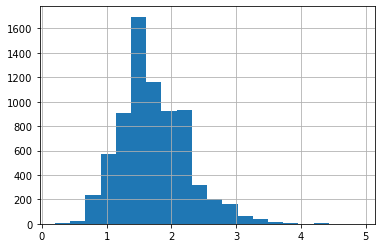

In [4]:
catania_mag=catania['Magnitude']
catania_mag.hist(bins=20)

All of the relevant data, previously loaded with Pandas, are now converted into numpy arrays by using the *to_numpy* method of the *DataFrame* or *DataSerie* Pandas objects:

In [5]:
# Transform the pandas Serie into a numpy array
catania_mag_np=catania_mag.to_numpy()

# Set minimum and maximum magnitude of the events 
min_mag=2.
max_mag=3.5

# Select the events having magnitude in the chosen range
cases=np.where((catania_mag_np >= min_mag) & (catania_mag_np <= max_mag))
catania_mag_np_lim=catania_mag_np[cases]

In [7]:
catania_mag_np_lim

array([2. , 2. , 3.4, ..., 2.3, 2. , 2.1])

Now, by using the numpy *histogram* function, we create a *numerical* histogram, by subdividing the seismic events in *channels* (generally named *bins*) according to their respective magnitudes. The higher the number of *bins*, the higher the *resolution* of the histogram: 

In [14]:
# Compute a numerical histogram with a given number of bins (resolution)
n_bin=30
mag_bins=np.histogram(catania_mag_np_lim, bins=n_bin)

# Store magnitude and number of events (from the histogram) in
# separated numpy arrays 
bin_mag_val=mag_bins[1]
bin_mag_count=mag_bins[0]

print(bin_mag_val)
print(bin_mag_count)

[2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65
 2.7  2.75 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35
 3.4  3.45 3.5 ]
[404   0 358   0 303   0 270   0 169   0 149   0 116   0  88   0  64   0
  54   0  42   0  35   0  27   0  20  17   0   9]


Pay attention to the zeros...

In [15]:
bin_mag_count_log=np.log10(bin_mag_count)

C:\Users\Utente\AppData\Local\Temp/ipykernel_15084/4219721271.py:1: RuntimeWarning: divide by zero encountered in log10
  bin_mag_count_log=np.log10(bin_mag_count)


So, start to find the indexes of the *bin_mag_count* array corresponding to the *non zero* values:

In [16]:
pos=np.where(bin_mag_count != 0)

In [17]:
pos

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 27, 29],
       dtype=int64),)

Then use pos to select the values:

In [18]:
bin_mag_count=bin_mag_count[pos]
bin_mag_val=bin_mag_val[pos]

print(bin_mag_count)

[404 358 303 270 169 149 116  88  64  54  42  35  27  20  17   9]


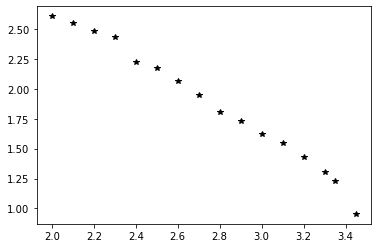

In [19]:
bin_mag_count_log=np.log10(bin_mag_count)

plt.figure()
plt.plot(bin_mag_val, bin_mag_count_log, "k*")
plt.show()

Count the number of event for each value of the magnitude found in the DataSerie:

Now, we make a ***linear regression*** of the two plotted variables above, by using the numpy function *polyfit*. results from *polyfit* (coefficients of regression) are stored in the array *fit*: 

In [20]:
fit, cov=np.polyfit(bin_mag_val, bin_mag_count_log, 1, cov=True)

print(type(fit), fit)

<class 'numpy.ndarray'> [-1.08847191  4.8681236 ]


Print of the covariance matrix:

In [21]:
print(cov)

[[ 0.00101753 -0.00279185]
 [-0.00279185  0.00786774]]


Now, we want to check the fit, by plotting the actual data along with the regression line. In principle, since we have to plot a line, two points only would be required; however, to show the general case, 

- we generate an array of values of the independent values (the magnitude, *mag_plot*) by using the numpy function *linspace* 
- we use the numpy function *polyval* to compute the corrisponding log of the number of events (from the *fit* polyfit array) 

In [22]:
npoint=10
mag_plot=np.linspace(min_mag, max_mag, npoint)
mag_count_plot=np.polyval(fit, mag_plot)

Lastly, we generate the plot: 

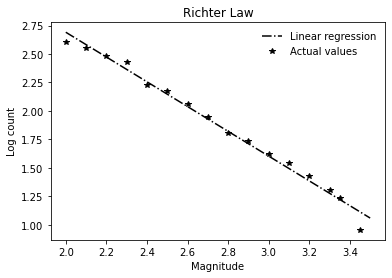

In [30]:
plt.figure()
plt.plot(mag_plot, mag_count_plot, "k-.", label="Linear regression")
plt.plot(bin_mag_val, bin_mag_count_log, "k*", label="Actual values")
plt.xlabel('Magnitude')
plt.ylabel('Log count')
plt.title('Richter Law')
plt.legend(frameon=False)
plt.show()

### Exercise

Restructure the whole procedure in the form of functions or, better yet, by using classes...